# CS506 UBI project

## Q3: How many (& what percentage of) people or families are living under the poverty lines with respect to each family size?

Author: Tsung-Han Yu

The data containing relevant information is S1702. I used the data Alex already cleaned and saved as ['S1702_cleaned.csv'](https://drive.google.com/file/d/1uUbhCdY_LtLJv8f9uOw139y4BEuT0TwZ/view?usp=share_link). Since the data only specify families instead of people, I'll be using the family size as the unit of analysis.

In [18]:
import pandas as pd

df = pd.read_csv('S1702_cleaned.csv')

In [19]:
df.columns

Index(['Census Tract', 'Family Status', 'Data', 'Value', 'Families',
       'With related children of householder under 18 years',
       'With related children of householder under 5 years',
       'With related children of householder under 5 years and 5 to 17 years',
       'With related children of householder 5 to 17  years',
       'RACE AND HISPANIC OR LATINO ORIGIN',
       'Families with a householder who is--', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'Householder worked',
       'Householder worked full-time, year-round in the past 12 months',
       'Householder 65 years and over', 'Family received --',
       'Supplemental Security Income (SSI) and/or cash public assistance income in the p

## Extract relevant columns

In [20]:
df['Value'].unique()

array(['Estimate', 'Margin of Error'], dtype=object)

In [21]:
family_size = ['2 people',
                '3 or 4 people',
                '5 or 6 people',
                '7 or more people']
all_families_mask = df['Family Status'] == 'All families'
total_data_mask = df['Data'] == 'Total'
pct_below_poverty_mask = df['Data'] == 'Percent below poverty level'
value_est_mask = df['Value'] == 'Estimate'
value_moe_mask = df['Value'] == 'Margin of Error'
census_tract_mask = df['Census Tract'] == 'Census Tract'

total_family_est = df[all_families_mask & total_data_mask & value_est_mask][family_size]
total_family_moe = df[all_families_mask & total_data_mask & value_moe_mask][family_size]
pct_below_poverty_est = df[all_families_mask & pct_below_poverty_mask & value_est_mask][family_size]
pct_below_poverty_moe = df[all_families_mask & pct_below_poverty_mask & value_moe_mask][family_size]

These are the number of missing values in 'Percent below poverty level' column. '7 or more people' has a lot more missing values than others.

In [22]:
pct_below_poverty_est.isna().sum(), pct_below_poverty_moe.isna().sum()

(2 people             17
 3 or 4 people        21
 5 or 6 people        60
 7 or more people    153
 dtype: int64,
 2 people             17
 3 or 4 people        21
 5 or 6 people        60
 7 or more people    153
 dtype: int64)

I'll fill the missing values with zeros.

In [23]:
pct_below_poverty_est.fillna(0, inplace=True)
pct_below_poverty_moe.fillna(0, inplace=True)
pct_below_poverty_est.isna().sum(), pct_below_poverty_moe.isna().sum()

(2 people            0
 3 or 4 people       0
 5 or 6 people       0
 7 or more people    0
 dtype: int64,
 2 people            0
 3 or 4 people       0
 5 or 6 people       0
 7 or more people    0
 dtype: int64)

Calculate the total number of families living below poverty level by performing element-wise multiplication of the two dataframes.

In [24]:
num_families_below_poverty = (pct_below_poverty_est.values / 100) * total_family_est
num_families_below_poverty

,2 people,3 or 4 people,5 or 6 people,7 or more people
0,0.000,0.000,0.000,0.000
12,12.054,71.064,0.000,0.000
24,7.080,0.000,0.000,71.988
36,42.926,88.168,5.985,12.000
48,18.023,0.000,0.000,0.000
...,...,...,...,...
2760,0.000,0.000,0.000,0.000
2772,0.000,0.000,0.000,0.000
2784,0.000,0.000,0.000,0.000
2796,0.000,0.000,0.000,0.000


## 3.1 How many families are living under the poverty lines with respect to each family size?

In [25]:
num_families_below_poverty.sum()

2 people            8199.620
3 or 4 people       8115.030
5 or 6 people       2429.193
7 or more people     451.965
dtype: float64

### Observation

The majority of families living under the poverty level have 2-4 people in their family, which comprises 85% of the total number of families living under the poverty level.

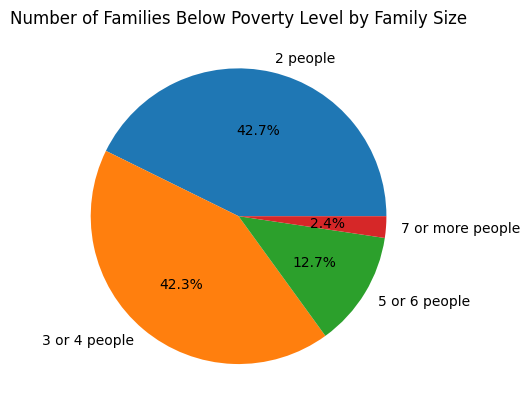

In [26]:
import matplotlib.pyplot as plt

series = num_families_below_poverty.sum()

series.plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Families Below Poverty Level by Family Size')
plt.ylabel('')

plt.show()

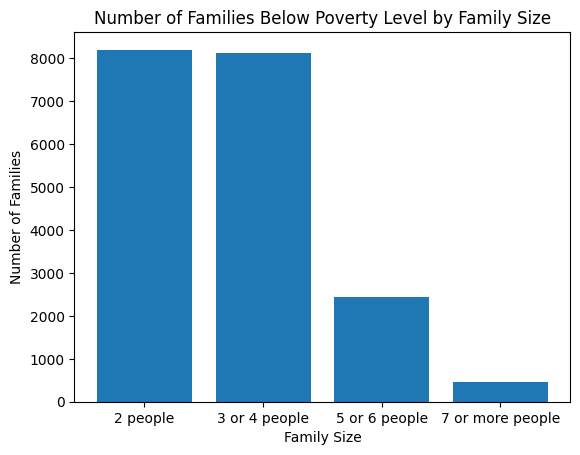

In [27]:
plt.bar(series.index, series.values)
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.title('Number of Families Below Poverty Level by Family Size')
plt.show()

## 3.2 What percentage of families are living under the poverty lines with respect to each family size?

In [28]:
pct_families_below_poverty = (num_families_below_poverty.sum() / total_family_est.sum().values) * 100
pct_families_below_poverty

2 people            11.433779
3 or 4 people       12.801549
5 or 6 people       15.346472
7 or more people    16.776726
dtype: float64

### Observation

There's an increasing trend of percentage of families with respect to family size, but note that the number of families with 7 or more people is a lot smaller.

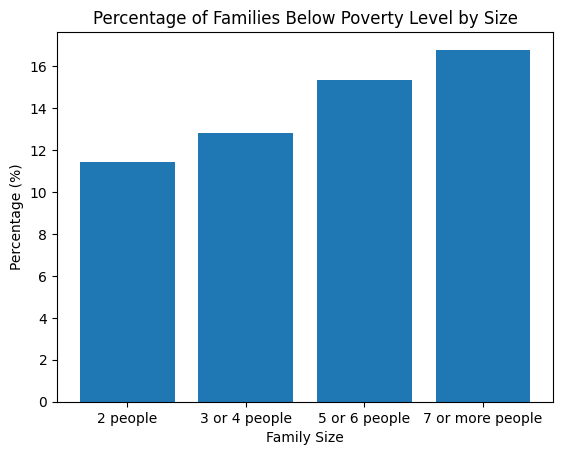

In [29]:
import matplotlib.pyplot as plt

series_pct = pct_families_below_poverty
series_abs = num_families_below_poverty.sum().round(0).astype(int)
fig, ax = plt.subplots()
plt.bar(series_pct.index, series_pct.values)
plt.xlabel('Family Size')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Families Below Poverty Level by Size')
plt.show()

### Visualization of "All Families vs Families Below Poverty Level by Family Size"

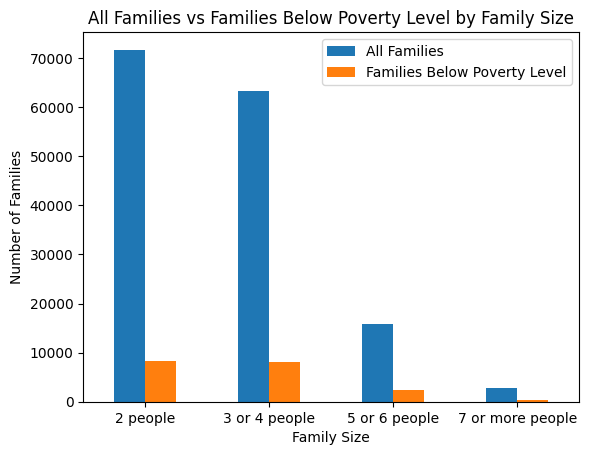

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Families Below Poverty Level': series_abs.values,
    'All Families': total_family_est.sum().astype(int).values,
}, index=series_pct.index)

fig, ax = plt.subplots()
data.plot(kind='bar', ax=ax)

ax.legend(loc='upper right')
ax.set_xlabel('Family Size')
ax.set_ylabel('Number of Families')
ax.set_title('')

plt.title('All Families vs Families Below Poverty Level by Family Size')
plt.xticks(rotation=0)
plt.show()